In [111]:
#import dependencies
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.express as px
import sklearn as skl
from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import keras_tuner as kt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from imblearn.metrics import classification_report_imbalanced
from imblearn.over_sampling import RandomOverSampler
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import Sequential
import pydotplus
from IPython.display import Image
pydotplus.graphviz.ExecutablePath = "C:\Program Files\Graphviz\bin"
import hvplot.pandas
%matplotlib inline

In [112]:
# Read uncleaned CSV file into a Pandas DataFrame
original_df=pd.read_csv("DATA SET/framingham.csv")

# Review the DataFrame
original_df.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

In [113]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [114]:
# Read the CSV file into a Pandas DataFrame
cvd_df=pd.read_csv("Framingham_clean.csv")

# Review the DataFrame
cvd_df.head()

Sex_Male  Age  Education  Current_Smoker  Cigarettes_Per_Day  \
0         1   39          4               0                   0   
1         0   46          2               0                   0   
2         1   48          1               1                  20   
3         0   61          3               1                  30   
4         0   46          3               1                  23   

   Blood_Pressure_Medications  Prevalent_Stroke  Prevalent_Hypertension  \
0                           0                 0                       0   
1                           0                 0                       0   
2                           0                 0                       0   
3                           0                 0                       1   
4                           0                 0                       0   

   Diabetes  Total_Cholesterol  Systolic_Blood_Pressure  \
0         0                195                    106.0   
1         0                250                    121.0   
2         0                245                    127.5   
3         0                225                    150.0   
4         0                285                    130.0   

   Diastolic_Blood_Pressure    BMI  Heart_Rate  Glucose  TenYearCHD  
0                      70.0  26.97          80       77           0  
1                      81.0  28.73          95       76           0  
2                      80.0  25.34          75       70           0  
3                      95.0  28.58          65      103           1  
4                      84.0  23.10          85       85           0

In [115]:
cvd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3658 entries, 0 to 3657
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Sex_Male                    3658 non-null   int64  
 1   Age                         3658 non-null   int64  
 2   Education                   3658 non-null   int64  
 3   Current_Smoker              3658 non-null   int64  
 4   Cigarettes_Per_Day          3658 non-null   int64  
 5   Blood_Pressure_Medications  3658 non-null   int64  
 6   Prevalent_Stroke            3658 non-null   int64  
 7   Prevalent_Hypertension      3658 non-null   int64  
 8   Diabetes                    3658 non-null   int64  
 9   Total_Cholesterol           3658 non-null   int64  
 10  Systolic_Blood_Pressure     3658 non-null   float64
 11  Diastolic_Blood_Pressure    3658 non-null   float64
 12  BMI                         3658 non-null   float64
 13  Heart_Rate                  3658 

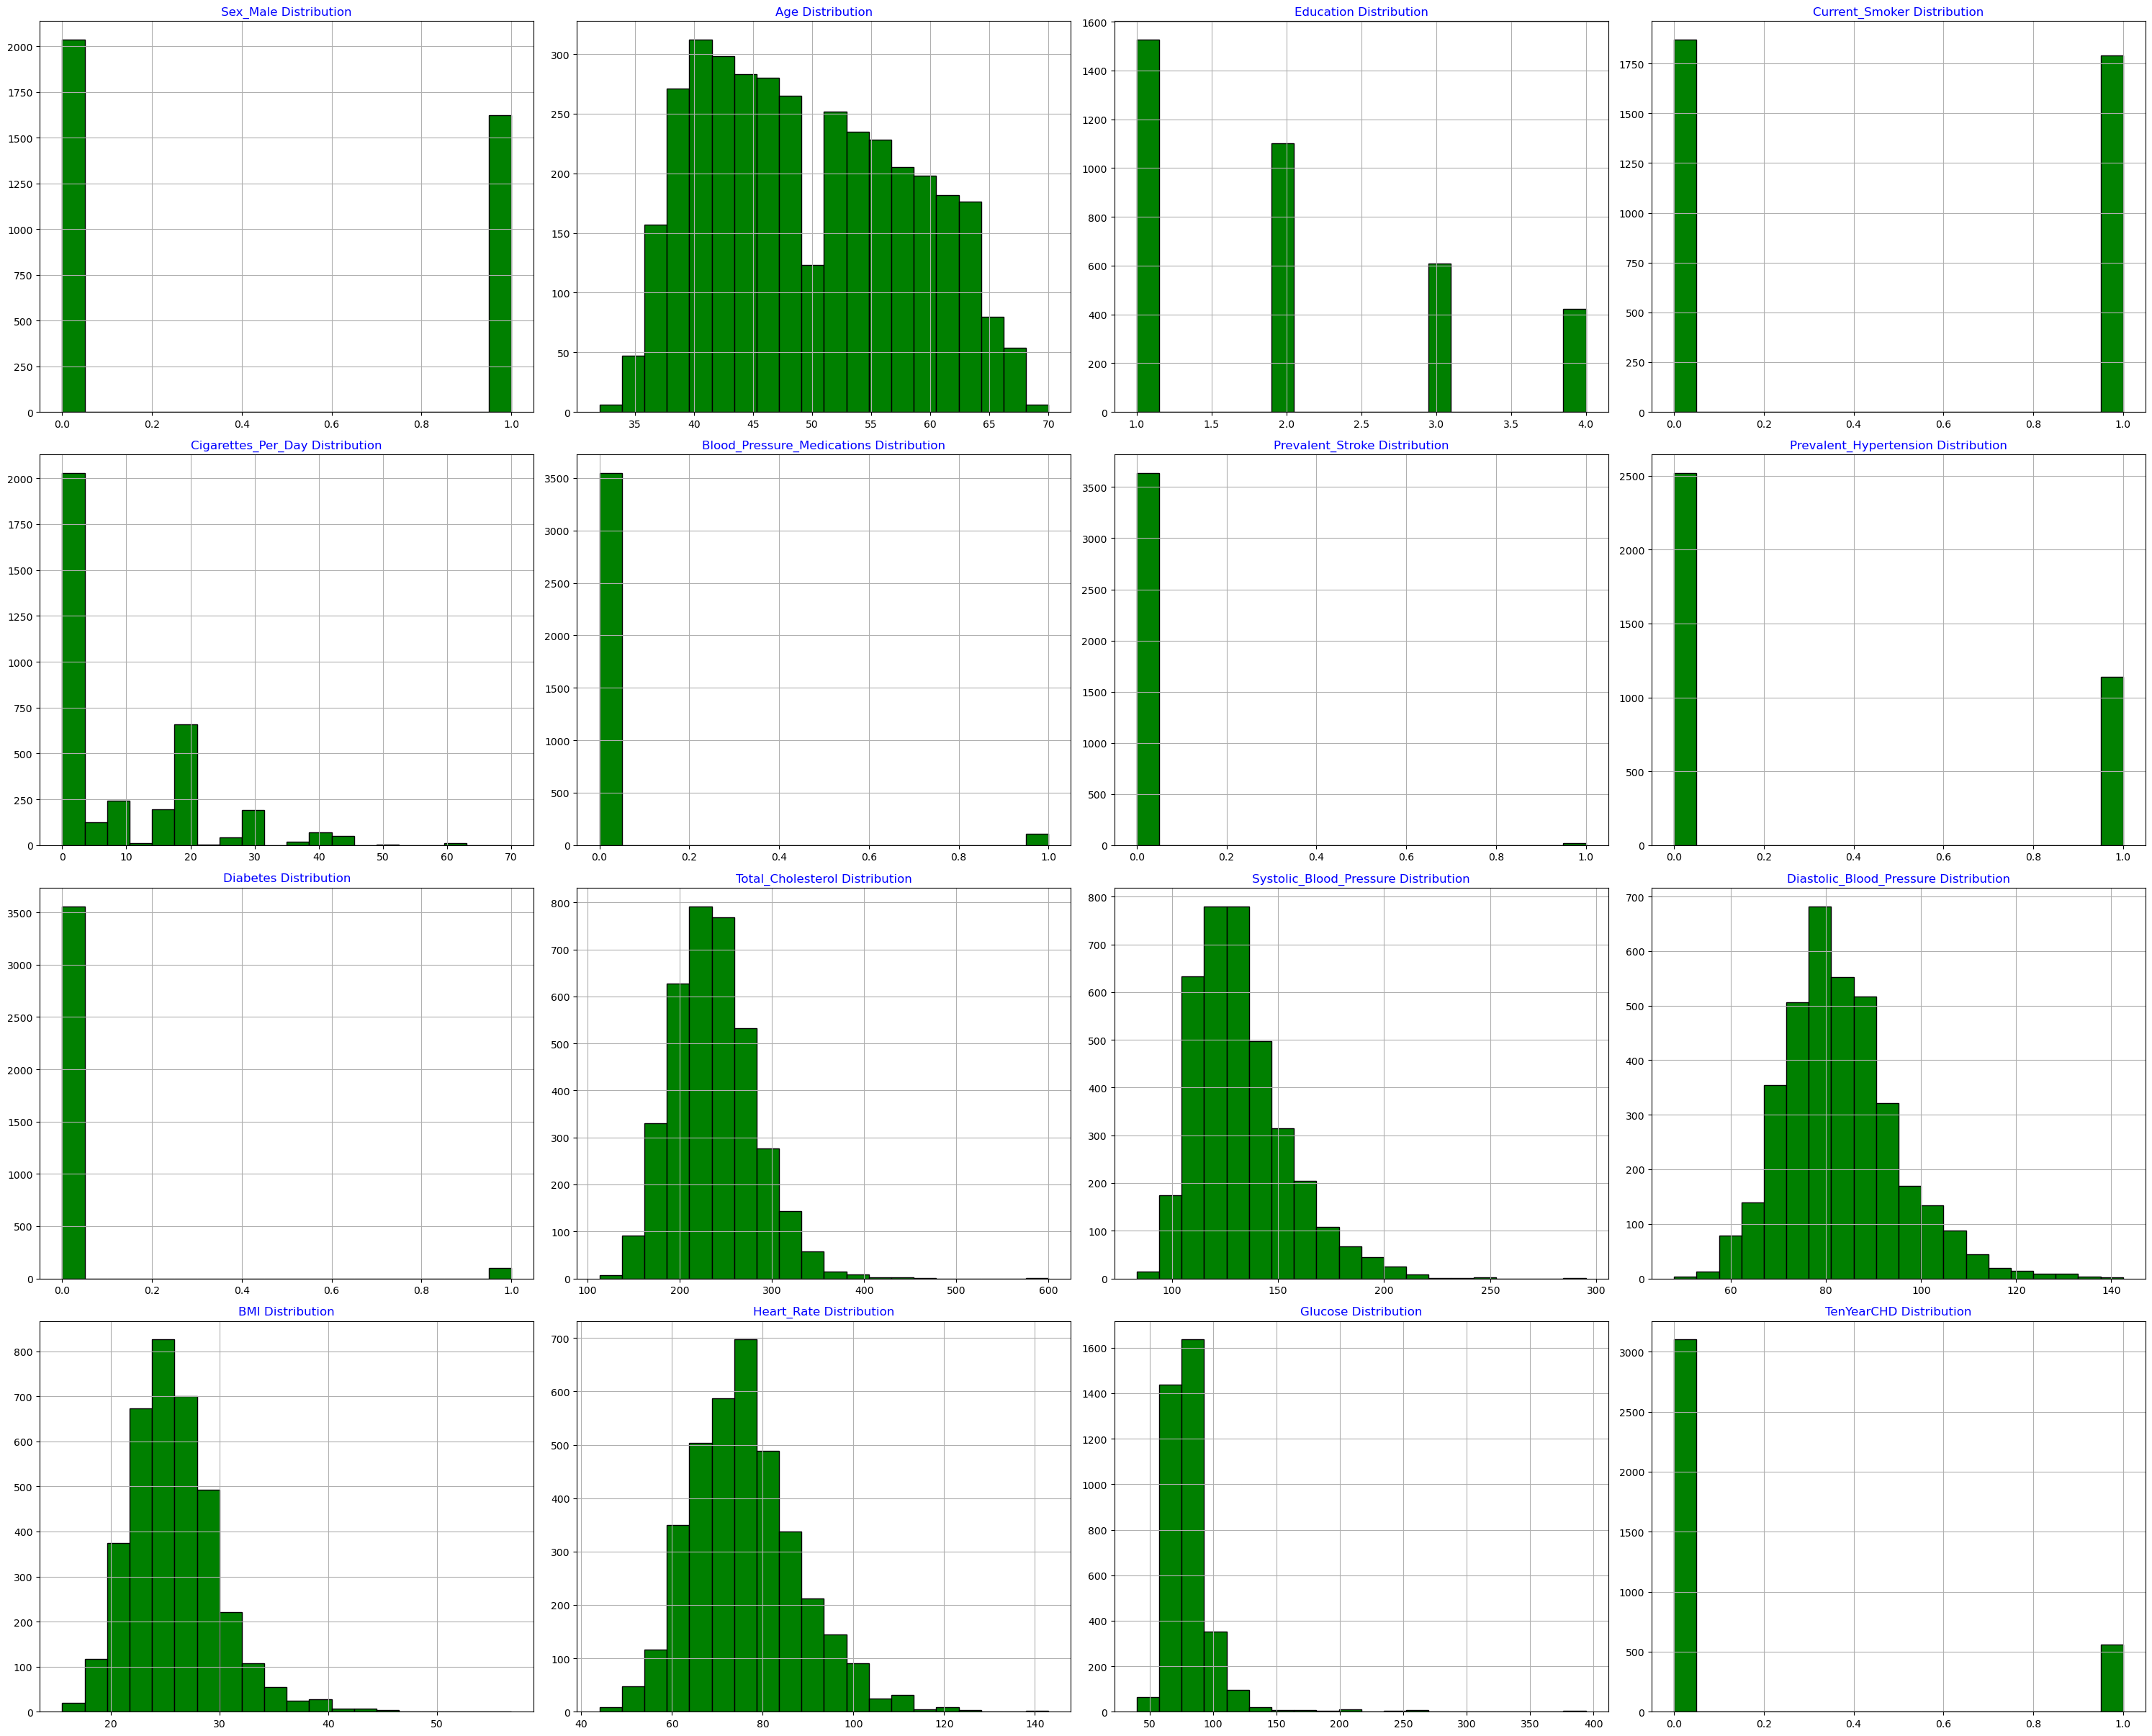

In [116]:
# Use for loop to create a list of Histograms for each column
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(30,30))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='green',edgecolor='black')
        ax.set_title(feature+" Distribution",color='blue')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(cvd_df,cvd_df.columns,5,4)

In [117]:
# Calculate the number of CHD cases (Yes/NO)
chd_total = cvd_df.TenYearCHD.value_counts()
chd_df = pd.DataFrame(chd_total)
chd_df.head()

TenYearCHD
0        3101
1         557

In [118]:
# plot the bar chart for TenYearCHD using plotly

chd_bar = px.bar(chd_df, x='TenYearCHD', y='TenYearCHD', title='CHD Cases (Yes/No)', color = 'TenYearCHD')
chd_bar.update_layout(    width=800,     height=800  )
chd_bar.show()


In [119]:
# Create a reduced DataFrame for a more precise analysis of the pairplot
cvd_df_pair = cvd_df[[ 'Total_Cholesterol',
       'Systolic_Blood_Pressure', 'Diastolic_Blood_Pressure', 'BMI',
       'Heart_Rate', 'Glucose', 'TenYearCHD']]

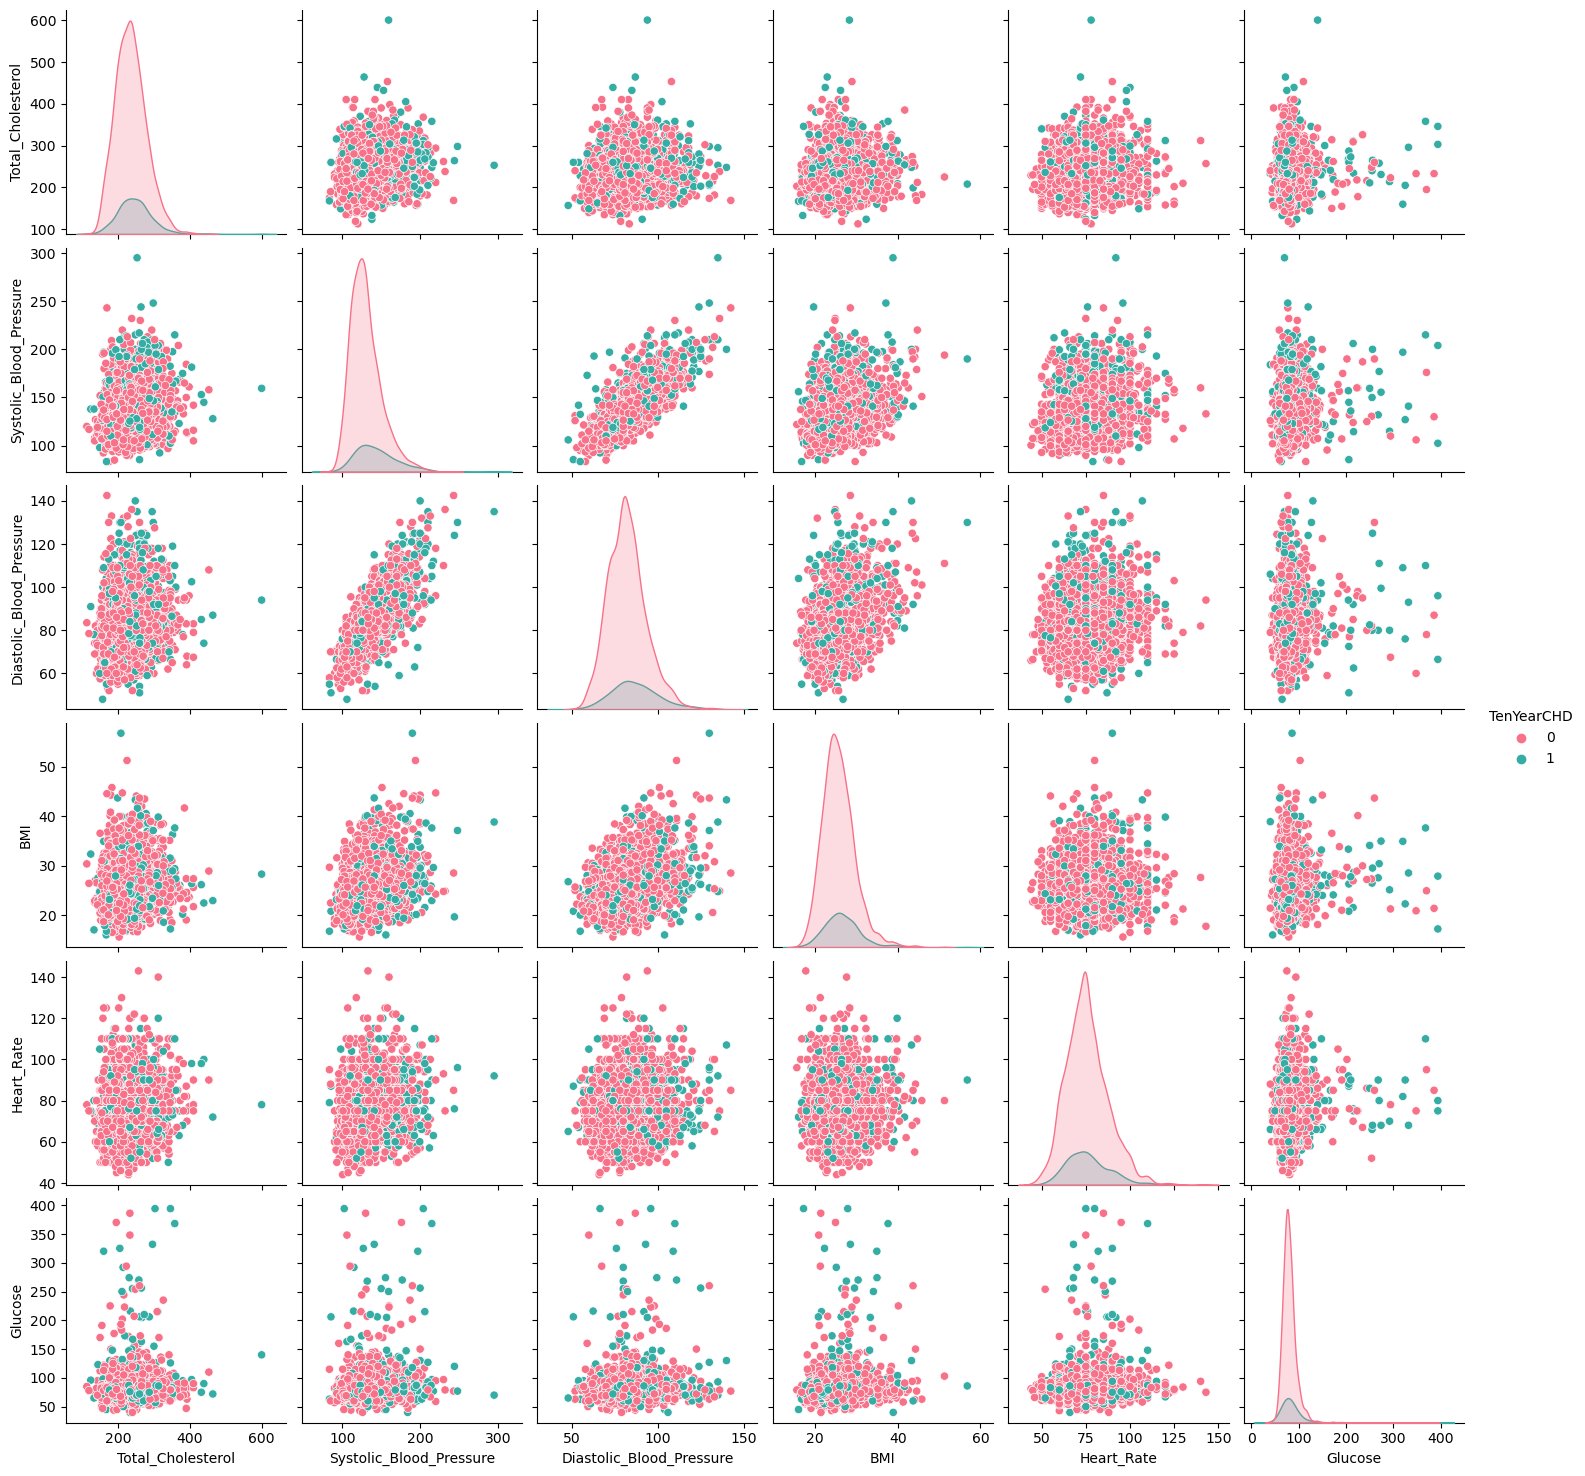

In [120]:
# Create a pairplot to visualize the distribution of the data
sn.pairplot(cvd_df_pair, hue='TenYearCHD', palette='husl', diag_kind='kde')

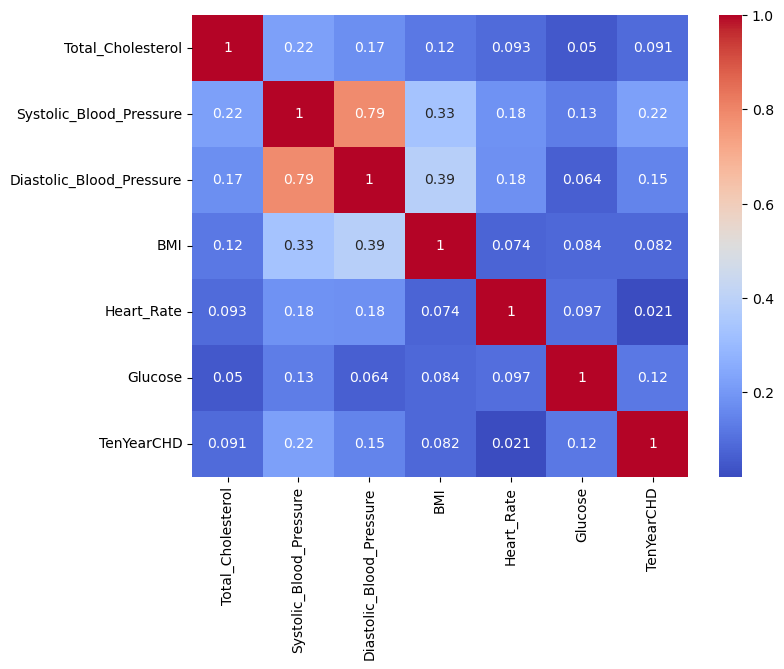

In [121]:
# Create the correlation matrix
corr_matrix = cvd_df_pair.corr()
# Set the figure size
plt.figure(figsize=(8, 6))
# Create the heatmap
sn.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

### Principal Component Analysis

In [122]:
#Using the StandardScaler() module to normalize the data.
cvd_scaled = StandardScaler().fit_transform(cvd_df)

In [123]:
# Creating a dataframe of the scaled data.
df_cvd_scaled = pd.DataFrame(cvd_scaled)

In [124]:
#Viewing scaled data frame
df_cvd_scaled.head()

0         1         2         3         4         5         6   \
0  1.119755 -1.232580  1.975209 -0.978364 -0.757169 -0.176901 -0.075987   
1 -0.893053 -0.414905  0.019249 -0.978364 -0.757169 -0.176901 -0.075987   
2  1.119755 -0.181283 -0.958730  1.022114  0.920689 -0.176901 -0.075987   
3 -0.893053  1.337256  0.997229  1.022114  1.759618 -0.176901 -0.075987   
4 -0.893053 -0.414905  0.997229  1.022114  1.172368 -0.176901 -0.075987   

         7         8         9         10        11        12        13  \
0 -0.672860 -0.166784 -0.949108 -1.194111 -1.078881  0.292050  0.356370   
1 -0.672860 -0.166784  0.298294 -0.514881 -0.160118  0.725010  1.608469   
2 -0.672860 -0.166784  0.184894 -0.220548 -0.243642 -0.108929 -0.060996   
3  1.486194 -0.166784 -0.268707  0.798296  1.009217  0.688110 -0.895729   
4 -0.672860 -0.166784  1.092095 -0.107344  0.090454 -0.659969  0.773736   

         14        15  
0 -0.203044 -0.423815  
1 -0.244883 -0.423815  
2 -0.495920 -0.423815  
3  0.884782  2.359518  
4  0.131672 -0.423815

In [125]:
# Creating a list to find the best value for the K-value
k = list(range(2,12))

In [126]:
# Creating an empty list
inertia = []

#Using a for loop to compute the inerita for every possibble value of K
#Creating a Kmeans model using i (loop counter) for the n_clusters
#Fitting the model to the data using the df_cvd_scaled
#Appending the model.inerita_ to the inertia list

for i in k:
  k_model = KMeans(n_clusters=i, random_state=3)
  k_model.fit(df_cvd_scaled)
  inertia.append(k_model.inertia_)

In [127]:
# Creating a dictionary with the data to Plot the Elbow curve
elbow_data = {"k":k, "inertia":inertia}

#Creating a dataframe with the data to plot the Elbow curve
df_cvd_elbow = pd.DataFrame(elbow_data)

In [128]:
# Initialize the K-Means model using the value of 6 for k
k_model = KMeans(n_clusters=5, random_state=3)

# Fit the K-Means model using the scaled data
k_model.fit(df_cvd_scaled)

# Predict the culsters to group.
k1 = k_model.predict(df_cvd_scaled)

In [129]:
# Create a copy of the DataFrame
df_cvd_scaled_prediction = df_cvd_scaled.copy()

#Adding the prediction column to the new dataframe
df_cvd_scaled_prediction["prediction_clusters"] = k1

# viewing data
df_cvd_scaled_prediction.head()

0         1         2         3         4         5         6  \
0  1.119755 -1.232580  1.975209 -0.978364 -0.757169 -0.176901 -0.075987   
1 -0.893053 -0.414905  0.019249 -0.978364 -0.757169 -0.176901 -0.075987   
2  1.119755 -0.181283 -0.958730  1.022114  0.920689 -0.176901 -0.075987   
3 -0.893053  1.337256  0.997229  1.022114  1.759618 -0.176901 -0.075987   
4 -0.893053 -0.414905  0.997229  1.022114  1.172368 -0.176901 -0.075987   

          7         8         9        10        11        12        13  \
0 -0.672860 -0.166784 -0.949108 -1.194111 -1.078881  0.292050  0.356370   
1 -0.672860 -0.166784  0.298294 -0.514881 -0.160118  0.725010  1.608469   
2 -0.672860 -0.166784  0.184894 -0.220548 -0.243642 -0.108929 -0.060996   
3  1.486194 -0.166784 -0.268707  0.798296  1.009217  0.688110 -0.895729   
4 -0.672860 -0.166784  1.092095 -0.107344  0.090454 -0.659969  0.773736   

         14        15  prediction_clusters  
0 -0.203044 -0.423815                    2  
1 -0.244883 -0.423815                    2  
2 -0.495920 -0.423815                    0  
3  0.884782  2.359518                    3  
4  0.131672 -0.423815                    0

In [130]:
# Creating a PCA model
pca = PCA(n_components=3)

# Fitting data to PCA model
cvd_pca_data = pca.fit_transform(df_cvd_scaled)

# Viewing the first five rows
cvd_pca_data[:5]

array([[-1.8734323 , -1.00573755,  0.06167353],
       [-0.10765625, -1.38301703, -0.16923781],
       [-1.03838225,  1.39631091, -0.22088042],
       [ 1.82652851,  2.00353452,  0.2421696 ],
       [-0.85635712,  0.95883107,  0.03908421]])

In [131]:
# Retrieve the explained variance to deteremine how much information can be atributed to each principal component
pca.explained_variance_ratio_

array([0.20627485, 0.11930095, 0.09867416])

In [132]:
# Creating a new DataFrame with PCA data
cvd_pca_df = pd.DataFrame(
    cvd_pca_data,
    columns=["PC1","PC2","PC3"]
)

# Displaying data
cvd_pca_df.head()

PC1       PC2       PC3
0 -1.873432 -1.005738  0.061674
1 -0.107656 -1.383017 -0.169238
2 -1.038382  1.396311 -0.220880
3  1.826529  2.003535  0.242170
4 -0.856357  0.958831  0.039084

In [133]:
# Creating a list for k-values (the 2, 12 Range was neccessary to run on Mac)
k = list(range(2,12))

# Creating an empty list to store inertia values
inertia = []

#Creating a loop to compute the inertia with each possble value of k

for i in k:
    k_model = KMeans(n_clusters=i, random_state=3)
    k_model.fit(cvd_pca_df)
    inertia.append(k_model.inertia_)

In [134]:
# Creating a dictionary with the data to plot Elbow Curve
elbow_data = {"k":k, "inertia":inertia}

# Creating a DataFrame with the data to plot the elbow curve
df_elbow_pca = pd.DataFrame(elbow_data)

In [135]:
#Plotting the pca elbow curve to visually determine the k value
pca_elbow = df_elbow_pca.hvplot.line(
    x="k",
    y="inertia",
    xticks = k
)
pca_elbow

:Curve   [k]   (inertia)

In [136]:
# Initalizing the K-Means model using the best value for k
model = KMeans(n_clusters=5, random_state=3)

# Fit the K-Means model using the PCA data
model.fit(cvd_pca_df)
# Predict the cluster to group using the PCA data
k_2 = model.predict(cvd_pca_df)

# viewing cluster data
k_2

array([2, 2, 1, ..., 2, 2, 1])

In [137]:
# Creating a copy of the DataFrame with the PCA data
cvd_pca_predict_df = cvd_pca_df.copy()

# Adding a new column to DataFrame with Predicted Clusters
cvd_pca_predict_df["predict_clusters"] = k_2

# Viewing Data
cvd_pca_predict_df.head(10)

PC1       PC2       PC3  predict_clusters
0 -1.873432 -1.005738  0.061674                 2
1 -0.107656 -1.383017 -0.169238                 2
2 -1.038382  1.396311 -0.220880                 1
3  1.826529  2.003535  0.242170                 3
4 -0.856357  0.958831  0.039084                 1
5  2.982947 -0.523755 -0.723123                 0
6  0.886046 -1.451273  0.431161                 2
7 -1.939535  0.418671  0.229105                 1
8  1.469671 -0.389024 -0.551754                 0
9  1.377989  2.973261 -0.576315                 3

In [269]:
# Plotting a scatter plot of the predictied data clusters
scatter_cvd_pca_predict = cvd_pca_predict_df.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="predict_clusters"
)
scatter_cvd_pca_predict

:NdOverlay   [predict_clusters]
   :Scatter   [PC1]   (PC2)

In [270]:
# Seeking the best n_component value for the PCA
# Starting n_components value with 3 
pca_value = 3
pca_sum = 0

while pca_sum < .99:

  pca = PCA(n_components = pca_value)

  # Fitting data to PCA model
  X_train_scale_pca = pca.fit_transform(X_train_scaled)
  X_test_scale_pca = pca.fit_transform(X_test_scaled)

  # Adding up the total variance
  pca_sum = pca.explained_variance_ratio_.sum()
  pca_value = pca_value + 1

  print("Total explained variance:", pca_sum, "\nPCA value:", pca_value)

Total explained variance: 0.46246249448614923 
PCA value: 4
Total explained variance: 0.5611691530630533 
PCA value: 5
Total explained variance: 0.62784599298309 
PCA value: 6
Total explained variance: 0.6937454000393535 
PCA value: 7
Total explained variance: 0.7575756954954761 
PCA value: 8
Total explained variance: 0.8127662321470184 
PCA value: 9
Total explained variance: 0.8599297946631665 
PCA value: 10
Total explained variance: 0.9007300516315876 
PCA value: 11
Total explained variance: 0.9346528424705302 
PCA value: 12
Total explained variance: 0.958377058647848 
PCA value: 13
Total explained variance: 0.9759770102319072 
PCA value: 14
Total explained variance: 0.9893437777545242 
PCA value: 15
Total explained variance: 1.0 
PCA value: 16


In [271]:
pca = PCA(n_components = 7)

# Fitting data to PCA model
X_train_scale_pca = pca.fit_transform(X_train_scaled)
X_test_scale_pca = pca.fit_transform(X_test_scaled)

pca.explained_variance_ratio_

array([0.20501036, 0.137853  , 0.11959914, 0.09870666, 0.06667684,
       0.06589941, 0.0638303 ])

In [285]:

def matrix_confusion(y_test, prediction,label):
  # Calculating the confusion matrix
  cm = confusion_matrix(y_test, prediction)
  cm_df = pd.DataFrame(
      cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
  )

  # Calculating the accuracy score
  acc_score = accuracy_score(y_test, prediction)

  # Displaying results
  print(label)
  display(cm_df)


    # Define the confusion matrix values
  c_matrix = cm_df.values
  # Define class labels
  labels = ['0', '1']
  # Plot the confusion matrix as a heatmap
  plt.imshow(c_matrix, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title('Confusion Matrix')
  plt.colorbar()
  tick_marks = np.arange(len(labels))
  plt.xticks(tick_marks, labels)
  plt.yticks(tick_marks, labels)
  # Add labels to each cell
  thresh = c_matrix.max() / 2.
  for i, j in np.ndindex(c_matrix.shape):
      plt.text(j, i, format(c_matrix[i, j]), horizontalalignment="center",
              color="white" if c_matrix[i, j] > thresh else "black")
  # Add axes labels
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  # Show the plot
  plt.show()

  print(f"RF Accuracy Score : {acc_score}")
  print("RF Classification Report")
  print(classification_report(y_test, prediction))

In [280]:
# Creating a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allowing kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allowing kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=10,
        step=2), activation=activation, input_dim=7))

    # Allowing kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=10,
            step=2),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [281]:
def random_forest_pca(X_train_scale_pca, y_train, X_test_scale_pca, y_test):
  label = "Random Forest PCA"
  # Creating a random forest classifier
  rf_model = RandomForestClassifier(n_estimators=500, random_state=1).fit(X_train_scale_pca, y_train)
  # Making Prediction using the testing data
  prediction = rf_model.predict(X_test_scale_pca)
  matrix_confusion(y_test, prediction, label)

In [282]:
def keras_nearest_neighbors(X_train_scale_pca, y_train, X_test_scale_pca,y_test):
  label = "K Nearest Neighbors"
  kn_model = KNeighborsClassifier(n_neighbors=3).fit(X_train_scale_pca,y_train)
  prediction = kn_model.predict(X_test_scale_pca)
  matrix_confusion(y_test,prediction,label)

In [286]:
def keras_neural_network(X_train_scale_pca, y_train, X_test_scale_pca,y_test):
  label = "Keras Neural Network"
  
  tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=50,
    hyperband_iterations=2)
  
   # Run the kerastuner search for best hyperparameters
  tuner.search(X_train_scale_pca,y_train,epochs=50,validation_data=(X_test_scale_pca,y_test))

   # Get best model hyperparameters
  best_hyper = tuner.get_best_hyperparameters(1)[0]
  best_hyper.values

   # Evaluate best model against full test data
  best_model = tuner.get_best_models(1)[0]
  model_loss, model_accuracy = best_model.evaluate(X_test_scale_pca,y_test,verbose=2)
  print(label)
  print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Random Forest PCA


Predicted 0  Predicted 1
Actual 0          766            9
Actual 1          134            6

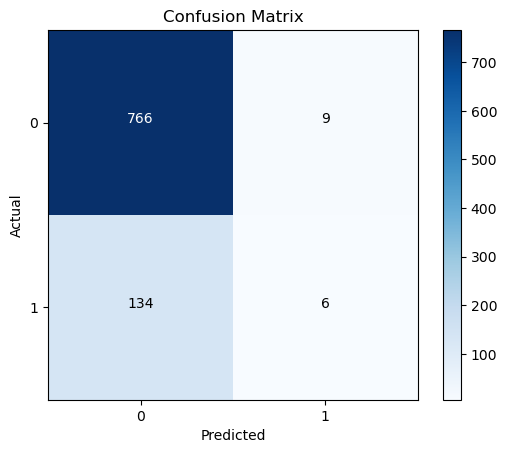

RF Accuracy Score : 0.8437158469945355
RF Classification Report
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       775
           1       0.40      0.04      0.08       140

    accuracy                           0.84       915
   macro avg       0.63      0.52      0.50       915
weighted avg       0.78      0.84      0.79       915

K Nearest Neighbors


c:\Users\agorbulin\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



Predicted 0  Predicted 1
Actual 0          720           55
Actual 1          121           19

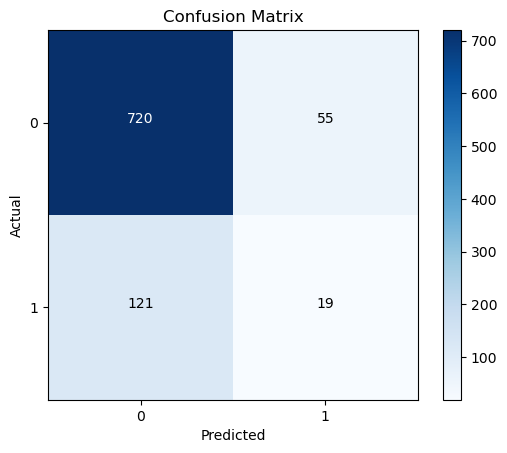

RF Accuracy Score : 0.8076502732240437
RF Classification Report
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       775
           1       0.26      0.14      0.18       140

    accuracy                           0.81       915
   macro avg       0.56      0.53      0.53       915
weighted avg       0.76      0.81      0.78       915



In [287]:
# Calling the Randomn Forest, Keras Nearest Neighbor with PCA function and passing in the X_train_scale_pca y_train and X_test_scale_pca
random_forest_pca(X_train_scale_pca, y_train, X_test_scale_pca,y_test)
keras_nearest_neighbors(X_train_scale_pca, y_train, X_test_scale_pca,y_test)

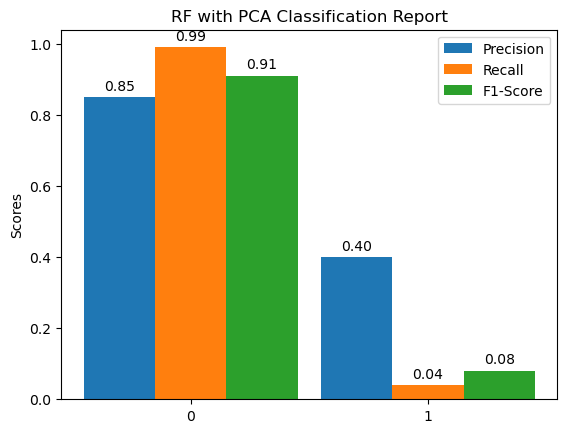

In [289]:
# Define the precision, recall, and F1-score values


precision = [0.85, 0.40]
recall = [0.99, 0.04]
f1_score = [0.91, 0.08]

# Define the class labels
labels = ['0', '1']

# Plot the precision, recall, and F1-score
x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

# Add labels, title, and legend
ax.set_ylabel('Scores')
ax.set_title('RF with PCA Classification Report')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add value labels to the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

# Show the plot
plt.show()

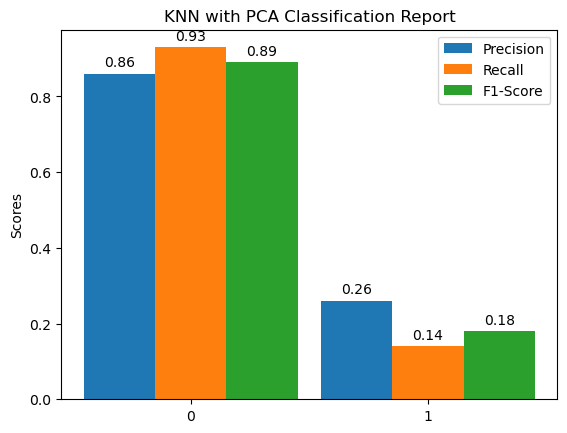

In [291]:
# Define the precision, recall, and F1-score values



precision = [0.86, 0.26]
recall = [0.93, 0.14]
f1_score = [0.89, 0.18]

# Define the class labels
labels = ['0', '1']

# Plot the precision, recall, and F1-score
x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

# Add labels, title, and legend
ax.set_ylabel('Scores')
ax.set_title('KNN with PCA Classification Report')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add value labels to the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

# Show the plot
plt.show()

In [236]:
# Calling the Keras Neural Network with PCA data and passing in the X_train_scale_pca, y_train, X_test_scale_pca, and y_test
keras_neural_network(X_train_scale_pca, y_train, X_test_scale_pca,y_test)

Trial 1 Complete [00h 00m 10s]
val_accuracy: 0.8469945192337036

Best val_accuracy So Far: 0.8469945192337036
Total elapsed time: 00h 00m 10s

Search: Running Trial #2

Value             |Best Value So Far |Hyperparameter
tanh              |tanh              |activation
1                 |7                 |first_units
1                 |4                 |num_layers
9                 |1                 |units_0
1                 |1                 |units_1
7                 |1                 |units_2
1                 |1                 |units_3
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
3                 |3                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/2


KeyboardInterrupt: 

## Supervised Machine Learning

### Split data into Features and Target

In [139]:
# Define features set
X = cvd_df.copy()
X.drop("TenYearCHD", axis=1, inplace=True)
X.head()

Sex_Male  Age  Education  Current_Smoker  Cigarettes_Per_Day  \
0         1   39          4               0                   0   
1         0   46          2               0                   0   
2         1   48          1               1                  20   
3         0   61          3               1                  30   
4         0   46          3               1                  23   

   Blood_Pressure_Medications  Prevalent_Stroke  Prevalent_Hypertension  \
0                           0                 0                       0   
1                           0                 0                       0   
2                           0                 0                       0   
3                           0                 0                       1   
4                           0                 0                       0   

   Diabetes  Total_Cholesterol  Systolic_Blood_Pressure  \
0         0                195                    106.0   
1         0                250                    121.0   
2         0                245                    127.5   
3         0                225                    150.0   
4         0                285                    130.0   

   Diastolic_Blood_Pressure    BMI  Heart_Rate  Glucose  
0                      70.0  26.97          80       77  
1                      81.0  28.73          95       76  
2                      80.0  25.34          75       70  
3                      95.0  28.58          65      103  
4                      84.0  23.10          85       85

In [140]:
 # Define target vector
y = cvd_df["TenYearCHD"].ravel()
y[:5]

array([0, 0, 0, 1, 0], dtype=int64)

In [141]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [142]:
 # Creating StandardScaler instance
scaler = StandardScaler()

In [143]:
 # Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [144]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

###  Fitting the Decision Tree Model

In [145]:
# Creating the decision tree classifier instance
dt_model = tree.DecisionTreeClassifier()

In [146]:
# Fitting the model
dt_model = dt_model.fit(X_train_scaled, y_train)

In [147]:
# Making predictions using the testing data
predictions = dt_model.predict(X_test_scaled)

### Model Evaluation

In [148]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [149]:
cm_df

Predicted 0  Predicted 1
Actual 0          641          134
Actual 1           94           46

In [150]:
# Displaying results
print("DT Confusion Matrix")
display(cm_df)
print(f"DT Accuracy Score : {acc_score}")
print("DT Classification Report")
print(classification_report(y_test, predictions))

DT Confusion Matrix


Predicted 0  Predicted 1
Actual 0          641          134
Actual 1           94           46

DT Accuracy Score : 0.7508196721311475
DT Classification Report
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       775
           1       0.26      0.33      0.29       140

    accuracy                           0.75       915
   macro avg       0.56      0.58      0.57       915
weighted avg       0.78      0.75      0.76       915



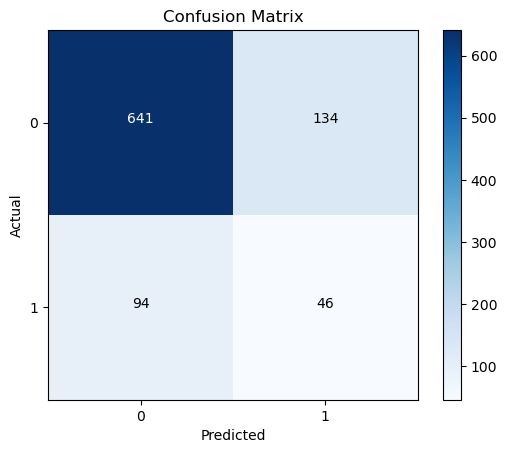

In [151]:
# Define the confusion matrix values
c_matrix = cm_df.values
# Define class labels
labels = ['0', '1']
# Plot the confusion matrix as a heatmap
plt.imshow(c_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# Add labels to each cell
thresh = c_matrix.max() / 2.
for i, j in np.ndindex(c_matrix.shape):
    plt.text(j, i, format(c_matrix[i, j]), horizontalalignment="center",
             color="white" if c_matrix[i, j] > thresh else "black")
# Add axes labels
plt.ylabel('Actual')
plt.xlabel('Predicted')
# Show the plot
plt.show()

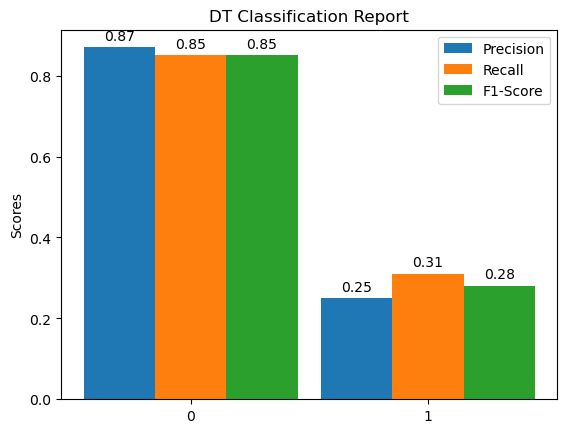

In [152]:
# Define the precision, recall, and F1-score values
precision = [0.87, 0.25]
recall = [0.85, 0.31]
f1_score = [0.85, 0.28]

# Define the class labels
labels = ['0', '1']

# Plot the precision, recall, and F1-score
x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

# Add labels, title, and legend
ax.set_ylabel('Scores')
ax.set_title('DT Classification Report')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add value labels to the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

# Show the plot
plt.show()

In [153]:
# Create DOT data

dot_data = tree.export_graphviz(dt_model, out_file=None,feature_names=X.columns,class_names=['0','1'],filled=True, rounded=True,special_characters=True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())



In [154]:
# Save graph to png file
graph.write_png("dt_model.png")

True

### Fitting the Random Forest Model

In [155]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=1)

In [156]:
 # Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

###  Making Predictions Using the Random Forest Model

In [157]:
 # Making predictions using the testing data
predictions_rf = rf_model.predict(X_test_scaled)

### Model Evaluation

In [158]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions_rf)
cm_df = pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions_rf)

In [159]:
 # Displaying results
print("RF Confusion Matrix")
display(cm_df)
print(f"RF Accuracy Score : {acc_score}")
print("RF Classification Report")
print(classification_report(y_test, predictions))

RF Confusion Matrix


Predicted 0  Predicted 1
Actual 0          769            6
Actual 1          136            4

RF Accuracy Score : 0.8448087431693989
RF Classification Report
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       775
           1       0.26      0.33      0.29       140

    accuracy                           0.75       915
   macro avg       0.56      0.58      0.57       915
weighted avg       0.78      0.75      0.76       915



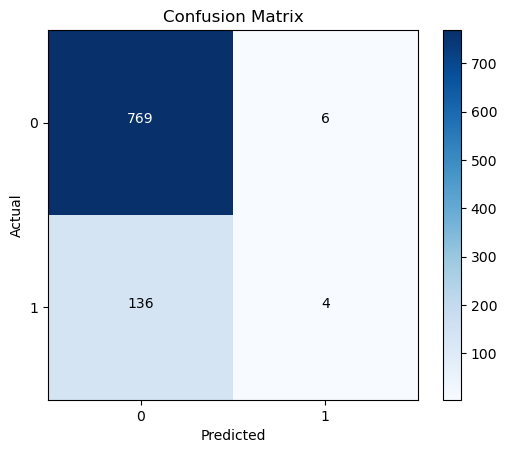

In [160]:
# Define the confusion matrix values
c_matrix = cm_df.values
# Define class labels
labels = ['0', '1']
# Plot the confusion matrix as a heatmap
plt.imshow(c_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# Add labels to each cell
thresh = c_matrix.max() / 2.
for i, j in np.ndindex(c_matrix.shape):
    plt.text(j, i, format(c_matrix[i, j]), horizontalalignment="center",
             color="white" if c_matrix[i, j] > thresh else "black")
# Add axes labels
plt.ylabel('Actual')
plt.xlabel('Predicted')
# Show the plot
plt.show()

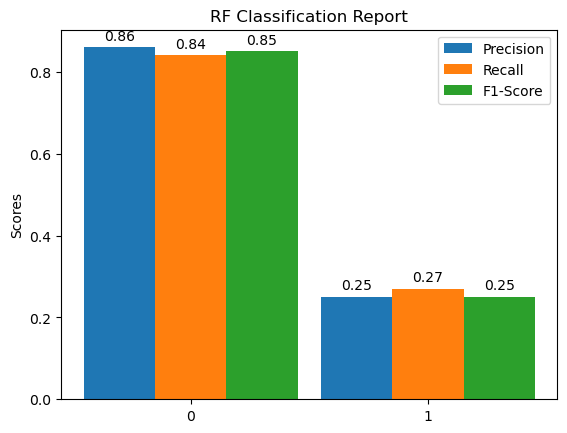

In [161]:
# Define the precision, recall, and F1-score values

precision = [0.86, 0.25]
recall = [0.84, 0.27]
f1_score = [0.85, 0.25]

# Define the class labels
labels = ['0', '1']

# Plot the precision, recall, and F1-score
x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

# Add labels, title, and legend
ax.set_ylabel('Scores')
ax.set_title('RF Classification Report')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add value labels to the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

# Show the plot
plt.show()

In [163]:
 # Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.13339031982652996, 'Systolic_Blood_Pressure'),
 (0.12872809244092706, 'BMI'),
 (0.1281075071286606, 'Age'),
 (0.12223071749935507, 'Total_Cholesterol'),
 (0.12023574141818423, 'Glucose'),
 (0.11916232255516142, 'Diastolic_Blood_Pressure'),
 (0.09483738807752018, 'Heart_Rate'),
 (0.049212468693805106, 'Cigarettes_Per_Day'),
 (0.036432943412911326, 'Education'),
 (0.020878156908295694, 'Sex_Male'),
 (0.01772737060052536, 'Prevalent_Hypertension'),
 (0.012219808876814635, 'Current_Smoker'),
 (0.007709252451526337, 'Blood_Pressure_Medications'),
 (0.007057377916311747, 'Diabetes'),
 (0.002070532193471244, 'Prevalent_Stroke')]

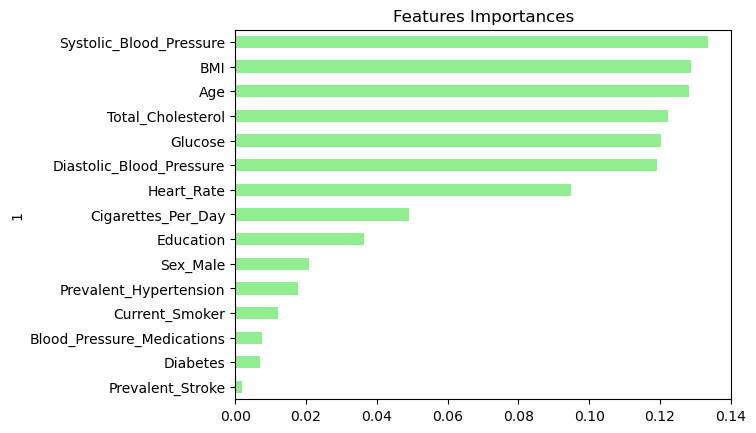

In [164]:
 # Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
feature_importance = importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

feature_importance.get_figure().savefig('feature_importance_plot.png')

##### Dropping the 4 least important features

In [165]:
# Creating a copy of our dataframe
cvd1_df = cvd_df.copy()

cvd1_df.drop(['Prevalent_Stroke','Diabetes', 'Blood_Pressure_Medications', 'Current_Smoker'], axis=1, inplace=True)

In [167]:
# Defining features set
X = cvd1_df.copy()
X.drop("TenYearCHD", axis=1, inplace=True)
X.head()

Sex_Male  Age  Education  Cigarettes_Per_Day  Prevalent_Hypertension  \
0         1   39          4                   0                       0   
1         0   46          2                   0                       0   
2         1   48          1                  20                       0   
3         0   61          3                  30                       1   
4         0   46          3                  23                       0   

   Total_Cholesterol  Systolic_Blood_Pressure  Diastolic_Blood_Pressure  \
0                195                    106.0                      70.0   
1                250                    121.0                      81.0   
2                245                    127.5                      80.0   
3                225                    150.0                      95.0   
4                285                    130.0                      84.0   

     BMI  Heart_Rate  Glucose  
0  26.97          80       77  
1  28.73          95       76  
2  25.34          75       70  
3  28.58          65      103  
4  23.10          85       85

In [168]:
# Defining target vector
y = cvd1_df["TenYearCHD"].ravel()
y[:5]

array([0, 0, 0, 1, 0], dtype=int64)

In [172]:
 # Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [173]:
# Creating the StandardScaler instance
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)
# Scaling the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Fitting the KNeighbors Model

In [174]:
# Instantiating the model with k = 3 neighbors
kn_model = KNeighborsClassifier(n_neighbors=3)

In [175]:
# Training the model
kn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

### Making Predictions using the KN model

In [176]:
# Creating predictions
y_pred = kn_model.predict(X_test_scaled)

# Reviewing the predictions
y_pred

c:\Users\agorbulin\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,

In [295]:
# Printing the confusion matrix
knn_cm = confusion_matrix(y_pred,y_test)
knn_cm_df = pd.DataFrame(knn_cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
knn_cm_df

Predicted 0  Predicted 1
Actual 0          725          118
Actual 1           50           22

In [303]:
# Printing the classification report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90       843
           1       0.16      0.31      0.21        72

    accuracy                           0.82       915
   macro avg       0.55      0.58      0.55       915
weighted avg       0.87      0.82      0.84       915



In [302]:
# Calculating the confusion matrix
knn_cm = knn_cm_df.values
knn_cm_df = pd.DataFrame(
    knn_cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("K-nearest Confusion Matrix")
display(knn_cm_df)
print(f"RF Accuracy Score : {acc_score}")
print("RF Classification Report")
print(classification_report(y_pred, y_test))

K-nearest Confusion Matrix


Predicted 0  Predicted 1
Actual 0          725          118
Actual 1           50           22

RF Accuracy Score : 0.7508196721311475
RF Classification Report
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       843
           1       0.16      0.31      0.21        72

    accuracy                           0.82       915
   macro avg       0.55      0.58      0.55       915
weighted avg       0.87      0.82      0.84       915



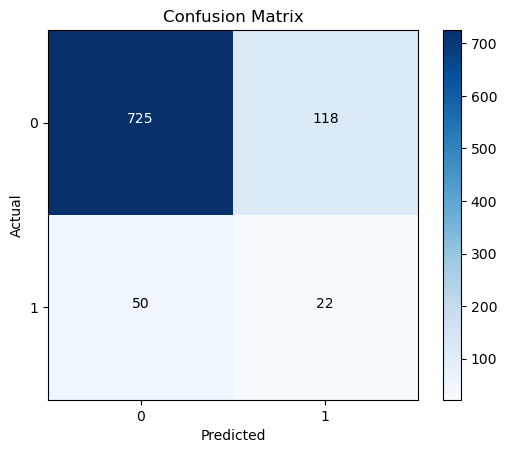

In [296]:
# Define the confusion matrix values
c_matrix = knn_cm_df.values
# Define class labels
labels = ['0', '1']
# Plot the confusion matrix as a heatmap
plt.imshow(c_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# Add labels to each cell
thresh = c_matrix.max() / 2.
for i, j in np.ndindex(c_matrix.shape):
    plt.text(j, i, format(c_matrix[i, j]), horizontalalignment="center",
             color="white" if c_matrix[i, j] > thresh else "black")
# Add axes labels
plt.ylabel('Actual')
plt.xlabel('Predicted')
# Show the plot
plt.show()

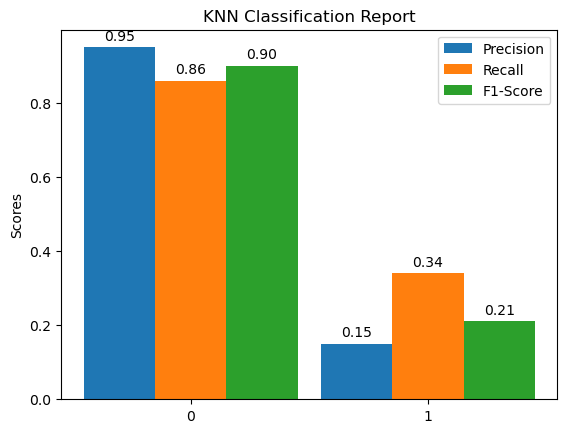

In [300]:
# Define the precision, recall, and F1-score values


precision = [0.95, 0.15]
recall = [0.86, 0.34]
f1_score = [0.90, 0.21]

# Define the class labels
labels = ['0', '1']

# Plot the precision, recall, and F1-score
x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

# Add labels, title, and legend
ax.set_ylabel('Scores')
ax.set_title('KNN Classification Report')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add value labels to the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

# Show the plot
plt.show()

### Creating a Keras Sequential model

In [183]:
 # Initiating the model add more than one Dense hidden layer
nn_model = tf.keras.models.Sequential()

nn_model.add(tf.keras.layers.Dense(units=6, activation="relu", input_dim=11))

nn_model.add(tf.keras.layers.Dense(units=6, activation="relu"))

nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Checking the structure of the Sequential model
nn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 6)                 72        
                                                                 
 dense_8 (Dense)             (None, 6)                 42        
                                                                 
 dense_9 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


### Fitting the NN model

In [184]:
 # Compiling the model and training 100 epochs
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
86/86 [==============================] - 5s 8ms/step - loss: 0.6556 - accuracy: 0.7043
Epoch 2/50
86/86 [==============================] - 1s 7ms/step - loss: 0.5510 - accuracy: 0.8465
Epoch 3/50
86/86 [==============================] - 1s 14ms/step - loss: 0.4693 - accuracy: 0.8480
Epoch 4/50
86/86 [==============================] - 1s 14ms/step - loss: 0.4280 - accuracy: 0.8480
Epoch 5/50
86/86 [==============================] - 1s 10ms/step - loss: 0.4093 - accuracy: 0.8480
Epoch 6/50
86/86 [==============================] - 1s 10ms/step - loss: 0.3989 - accuracy: 0.8483
Epoch 7/50
86/86 [==============================] - 1s 13ms/step - loss: 0.3928 - accuracy: 0.8487
Epoch 8/50
86/86 [==============================] - 1s 13ms/step - loss: 0.3894 - accuracy: 0.8498
Epoch 9/50
86/86 [==============================] - 1s 11ms/step - loss: 0.3871 - accuracy: 0.8491
Epoch 10/50
86/86 [==============================] - 1s 11ms/step - loss: 0.3855 - accuracy: 0.8491
Epoch 11/50

In [185]:
 # Evaluating the performance of model using the loss and predictive accuracy of the model on the test dataset.
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

29/29 - 0s - loss: 0.3926 - accuracy: 0.8415 - 307ms/epoch - 11ms/step
Loss: 0.3926306664943695, Accuracy: 0.8415300250053406


In [304]:

# Displaying results
#print("K-nearest Confusion Matrix")
#display(nn_cm_df)
print(f"Keras NN Accuracy Score : {model_accuracy}")



Keras NN Accuracy Score : 0.8590164184570312


Running auto-optimization using Keras Tuner to search for best hyperparameters

In [190]:
# Creating a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allowing kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allowing kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=10,
        step=2), activation=activation, input_dim=11))

    # Allowing kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=10,
            step=2),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [191]:
tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=50,
    hyperband_iterations=2)

INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


In [192]:
 # Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=50,validation_data=(X_test_scaled,y_test))

Trial 60 Complete [00h 00m 23s]
val_accuracy: 0.8524590134620667

Best val_accuracy So Far: 0.8568305969238281
Total elapsed time: 00h 07m 06s
INFO:tensorflow:Oracle triggered exit


In [193]:
 # Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'leaky_relu',
 'first_units': 3,
 'num_layers': 5,
 'units_0': 7,
 'units_1': 3,
 'units_2': 7,
 'units_3': 3,
 'units_4': 3,
 'units_5': 1,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 7,
 'tuner/bracket': 2,
 'tuner/round': 2,
 'tuner/trial_id': '0042'}

In [194]:
 # Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

29/29 - 1s - loss: 0.3814 - accuracy: 0.8568 - 1s/epoch - 49ms/step
Loss: 0.38142630457878113, Accuracy: 0.8568305969238281


In [195]:
# Creating a copy of our dataframe
cvd2_df = cvd_df.copy()

In [196]:
# Defining features set
X = cvd2_df.copy()
X.drop("TenYearCHD", axis=1, inplace=True)
X.head()

Sex_Male  Age  Education  Current_Smoker  Cigarettes_Per_Day  \
0         1   39          4               0                   0   
1         0   46          2               0                   0   
2         1   48          1               1                  20   
3         0   61          3               1                  30   
4         0   46          3               1                  23   

   Blood_Pressure_Medications  Prevalent_Stroke  Prevalent_Hypertension  \
0                           0                 0                       0   
1                           0                 0                       0   
2                           0                 0                       0   
3                           0                 0                       1   
4                           0                 0                       0   

   Diabetes  Total_Cholesterol  Systolic_Blood_Pressure  \
0         0                195                    106.0   
1         0                250                    121.0   
2         0                245                    127.5   
3         0                225                    150.0   
4         0                285                    130.0   

   Diastolic_Blood_Pressure    BMI  Heart_Rate  Glucose  
0                      70.0  26.97          80       77  
1                      81.0  28.73          95       76  
2                      80.0  25.34          75       70  
3                      95.0  28.58          65      103  
4                      84.0  23.10          85       85

In [197]:
# Defining target vector
y = cvd2_df["TenYearCHD"].ravel()
y[:5]

array([0, 0, 0, 1, 0], dtype=int64)

In [198]:
 # Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [199]:
# Creating the StandardScaler instance
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)
# Scaling the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [200]:
# Instantiating the model with k = 3 neighbors
kn_model = KNeighborsClassifier(n_neighbors=3)

In [201]:
# Training the model
kn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [202]:
# Creating predictions
y_pred = kn_model.predict(X_test_scaled)

# Reviewing the predictions
y_pred

c:\Users\agorbulin\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [203]:
# Printing the confusion matrix
confusion_matrix(y_pred,y_test)

array([[725, 118],
       [ 50,  22]], dtype=int64)

In [204]:
# Printing the classification report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90       843
           1       0.16      0.31      0.21        72

    accuracy                           0.82       915
   macro avg       0.55      0.58      0.55       915
weighted avg       0.87      0.82      0.84       915



In [ ]:
X_train_scaled.shape

Creating a Keras Sequential model

In [205]:
 # Initiating the model add more than one Dense hidden layer
nn_model = tf.keras.models.Sequential()

nn_model.add(tf.keras.layers.Dense(units=6, activation="relu", input_dim=15))

nn_model.add(tf.keras.layers.Dense(units=6, activation="relu"))

nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Checking the structure of the Sequential model
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 6)                 96        
                                                                 
 dense_8 (Dense)             (None, 6)                 42        
                                                                 
 dense_9 (Dense)             (None, 1)                 7         
                                                                 
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________


Fitting the NN model

In [206]:
 # Compiling the model and training 100 epochs
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
86/86 [==============================] - 3s 7ms/step - loss: 0.7599 - accuracy: 0.5341
Epoch 2/50
86/86 [==============================] - 0s 6ms/step - loss: 0.5295 - accuracy: 0.7860
Epoch 3/50
86/86 [==============================] - 0s 5ms/step - loss: 0.4384 - accuracy: 0.8454
Epoch 4/50
86/86 [==============================] - 0s 5ms/step - loss: 0.4127 - accuracy: 0.8494
Epoch 5/50
86/86 [==============================] - 1s 8ms/step - loss: 0.4034 - accuracy: 0.8491
Epoch 6/50
86/86 [==============================] - 1s 8ms/step - loss: 0.3981 - accuracy: 0.8494
Epoch 7/50
86/86 [==============================] - 1s 6ms/step - loss: 0.3952 - accuracy: 0.8498
Epoch 8/50
86/86 [==============================] - 1s 7ms/step - loss: 0.3925 - accuracy: 0.8505
Epoch 9/50
86/86 [==============================] - 1s 7ms/step - loss: 0.3906 - accuracy: 0.8498
Epoch 10/50
86/86 [==============================] - 1s 7ms/step - loss: 0.3891 - accuracy: 0.8502
Epoch 11/50
86/86 [

Evaluating the NN model

In [207]:
 # Evaluating the performance of model using the loss and predictive accuracy of the model on the test dataset.
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

29/29 - 1s - loss: 0.3863 - accuracy: 0.8448 - 716ms/epoch - 25ms/step
Loss: 0.38626256585121155, Accuracy: 0.8448087573051453


In [208]:
# Creating scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fitting the scaler
X_scaler.fit(X_train)

# Scaling the new resampled training data
X_train_scaled = X_scaler.transform(X_train)

Next we will use the newly resampled training data along with some auto-optimized hyperparameters with the NN model

Running auto-optimization using Keras Tuner to search for best hyperparameters

In [209]:
# Creating a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allowing kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allowing kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=10,
        step=2), activation=activation, input_dim=15))

    # Allowing kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=10,
            step=2),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [215]:
tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=50,
    hyperband_iterations=2)

In [216]:
 # Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=50,validation_data=(X_test_scaled,y_test))

Trial 180 Complete [00h 00m 37s]
val_accuracy: 0.8502732515335083

Best val_accuracy So Far: 0.8590164184570312
Total elapsed time: 00h 57m 00s
INFO:tensorflow:Oracle triggered exit


In [217]:
 # Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'tanh',
 'first_units': 5,
 'num_layers': 3,
 'units_0': 7,
 'units_1': 7,
 'units_2': 3,
 'units_3': 9,
 'units_4': 7,
 'units_5': 1,
 'tuner/epochs': 17,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 1,
 'tuner/round': 0}

In [218]:
 # Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

29/29 - 1s - loss: 0.3871 - accuracy: 0.8590 - 1s/epoch - 38ms/step
Loss: 0.38706737756729126, Accuracy: 0.8590164184570312


What if we resample our data using Random OverSampler?

In [219]:
# Creating a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allowing kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allowing kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=10,
        step=2), activation=activation, input_dim=15))

    # Allowing kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=10,
            step=2),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [220]:
tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=50,
    hyperband_iterations=2)

INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


In [221]:
# Instantiating the random oversampler model and assigning a random_state parameter of 1 to the model
ros = RandomOverSampler(random_state=1) 


# Fitting the original training data to the random_oversampler model
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# Creating scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fitting the scaler
X_scaler.fit(X_train_ros)

# Scaling the new resampled training data
X_train_ros_scaled = X_scaler.transform(X_train_ros)

In [ ]:
 # Run the kerastuner search for best hyperparameters
tuner.search(X_train_ros_scaled,y_train_ros,epochs=50,validation_data=(X_test_scaled,y_test))

In [ ]:
 # Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

In [ ]:
 # Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

###  Using SVM Model

In [173]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assign X (data) and y (target)
X = cvd_df.drop("TenYearCHD", axis=1)  # Features
y = cvd_df["TenYearCHD"]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier object
svm_classifier = svm.SVC(kernel='linear')

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8333333333333334
